In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df = df.sample(30000, random_state = 2) #get the same random questions everytime you run the code

In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [11]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
new_df.duplicated().sum()

0

0    19013
1    10987
Name: is_duplicate, dtype: int64
0    63.376667
1    36.623333
Name: is_duplicate, dtype: float64


<AxesSubplot:>

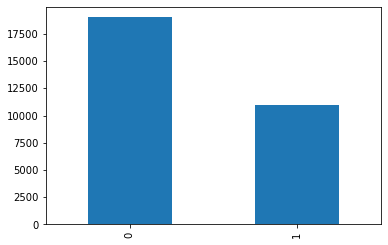

In [15]:
# Distrivution of duplicates and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind = 'bar')

In [18]:
#finding repeated questions 

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist()) #questions in 1 and 2
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 55299
Number of questions getting repeated 3480


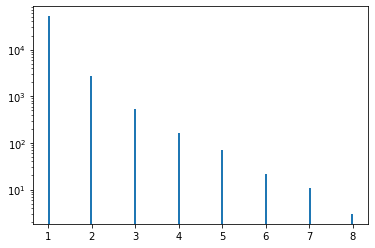

In [19]:
#Repeated questions histogram

plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()

In [22]:
#Feature engineering start!!!!!!

new_df['q1_len'] = new_df['question1'].str.len() #new col q1_len by finding lenght of question 1
new_df['q2_len'] = new_df['question2'].str.len() #new col q2_len by finding lenght of question 2

In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [24]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" "))) #count number of words and split over the spaces for the question
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" "))) #count number of words and split over the spaces for the question
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [27]:
# getting common words

def common_words(row): #pass a whole row with q1 and q2 
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) #get all words of q1 (with map fucntion and lambda function - lower and then strip the word) , then a list of all the split words would be the output
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))# get all words of q2 (after putting it ion the set get rid of the duplicate words)
    return len(w1 & w2) #find the set intersection between the two and then find the length 

In [28]:
new_df['word_common'] = new_df.apply(common_words, axis = 1) #apply it and put it in a new column
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [29]:
# adding the feature total words

def total_words(row): #the same transformation as common_words
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2)) ## add them together and find the length 

In [30]:
new_df['word_total'] = new_df.apply(total_words, axis = 1) #apply it and put it in a new column
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [31]:
# adding the wordshare feature

new_df['word_share'] = round(new_df['word_common']/new_df['word_total'], 2) #word common divided by word total 
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


minimum characters 2
maximum characters 391
average num of characters 59


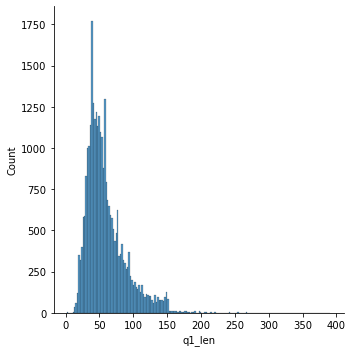

In [32]:
#Lets analyse the fetaures we added
sns.displot(new_df['q1_len']) #analyze q1 len
print('minimum characters', new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())
print('average num of characters', int(new_df['q1_len'].mean()))

minimum characters 6
maximum characters 1151
average num of characters 60


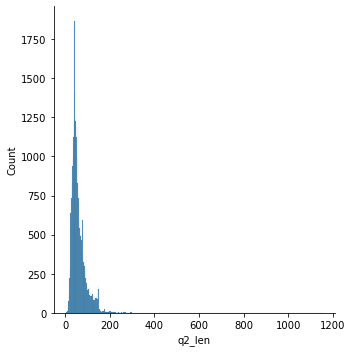

In [33]:
#Lets analyse the fetaures we added
sns.displot(new_df['q2_len']) #analyze q2 len
print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('average num of characters', int(new_df['q2_len'].mean()))

minimum characters 1
maximum characters 72
average num of characters 10


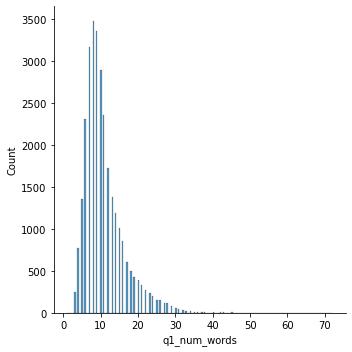

In [34]:
#Lets analyse the fetaures we added
sns.displot(new_df['q1_num_words']) #analyze q1 num_words
print('minimum characters', new_df['q1_num_words'].min())
print('maximum characters', new_df['q1_num_words'].max())
print('average num of characters', int(new_df['q1_num_words'].mean()))

minimum characters 1
maximum characters 237
average num of characters 11


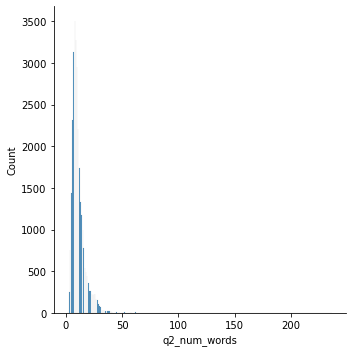

In [36]:
#Lets analyse the fetaures we added
sns.displot(new_df['q2_num_words']) #analyze q2 num_words
print('minimum characters', new_df['q2_num_words'].min())
print('maximum characters', new_df['q2_num_words'].max())
print('average num of characters', int(new_df['q2_num_words'].mean()))

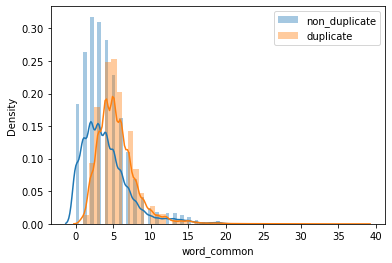

In [39]:
#Lets analyse the common words

sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'], label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'], label = 'duplicate')
plt.legend()
plt.show()

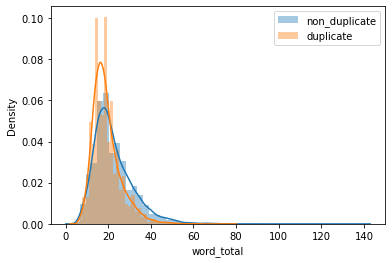

In [40]:
#Lets analyse the total words

sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'], label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'], label = 'duplicate')
plt.legend()
plt.show()

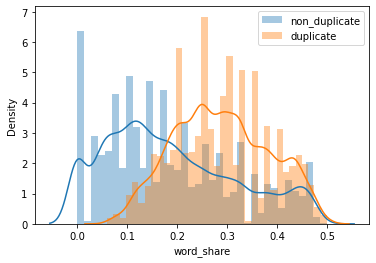

In [41]:
#Lets analyse the word share

sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'], label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'], label = 'duplicate')
plt.legend()
plt.show()

In [43]:
ques_df = new_df[['question1', 'question2']] #new dataframe with q1 and q2 separately
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [45]:
final_df = new_df.drop(columns = ['id', 'qid1', 'qid2', 'question1', 'question2'])#get rid of the 5 paramenters from the dataframe and put it into 'final_df' 
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [46]:
#apply bow to ques_df

from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features = 3000) #limit some columns (most used words)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2) #transform the list and get the bag of words (split 30000 for q1 and 30000 for q2)

In [47]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index) #convert them in a dataframe
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)#concatenate
temp_df.shape # 6000 cols (3000 by q1 qnd 3000 by q2)

(30000, 6000)

In [49]:
final_df = pd.concat([final_df, temp_df], axis = 1) #get the final dataframe after concatenating
print(final_df.shape)
final_df.head()

(30000, 12008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split #do the train_test split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:].values, final_df.iloc[:, 0].values, test_size = 0.2, random_state=1)

In [55]:
from sklearn.ensemble import RandomForestClassifier #run random forest and we see the acuracy is higher
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.768

In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7645